<a href="https://colab.research.google.com/github/Rajeevd381/Image_Classification_DS_Minor_Project_April/blob/main/Image_Classification(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Project

## Preprocessing

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR = '/content/drive/MyDrive/Images'
CATEGORIES = ['Bicycle','Car','Flower']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #Label Encoding
  path = os.path.join(DATADIR,category) #create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    # Resizing
    img_resized = resize(img_array,(150,150,3))
    # Flattning
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)   

## Spliting data into training and testing

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=109)


## Building Model

In [3]:
 from sklearn.model_selection import GridSearchCV
 from sklearn import svm
 param_grid = [
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
 ]

 svc = svm.SVC(probability=True)
 clf = GridSearchCV(svc,param_grid)
 clf.fit(x_train,y_train)
 

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [4]:
 y_pred = clf.predict(x_test)
 y_pred 

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1])

In [5]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1])

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [7]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [8]:
confusion_matrix(y_pred,y_test)

array([[4, 0, 0],
       [0, 9, 1],
       [0, 0, 4]])

## Saving the Model

In [9]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [10]:
model = pickle.load(open('img_model.p','rb'))

Enter your URL/content/drive/MyDrive/Images/Flower/f13.jpg
(251, 201, 3)
Predicted Output: Flower


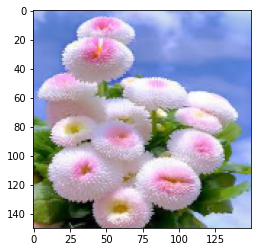

In [13]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized= resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output: {y_out}')


## DEPLOYING THE MODEL

In [11]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok


     |████████████████████████████████| 8.2MB 4.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 174kB 51.4MB/s 
     |████████████████████████████████| 4.2MB 41.7MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
     |████████████████████████████████| 112kB 53.6MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 122kB 38.2MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=3d117f706f532ad8191c5f11102847efd274f6429926191cf898c908e4d7d7b9
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installation

     |████████████████████████████████| 747kB 4.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=41b5cbbf39c7610068d41d80e9526f4dc8a6c89caa8ea1d33edaa7b677197fee
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [12]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image classification')
st.text('Upload the Image:')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an Image ... ",type = "jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('Pridict'):
    CATEGORIES = ['Bicycle','Car','Flower']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized= resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    st.write(img.shape)

    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.write(f'Predicted Output: {y_out}')
    q = model.predict_proba(flat_data)
    for index,item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}')

Writing app.py


In [13]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8051')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://2a99186b6a32.ngrok.io" -> "http://localhost:80">